In [1]:
import numpy as np
import numpy.matlib as mtl
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm

In [2]:
sz=np.array([[1,0],[0,-1]])
#初始化
m=0.1
t=1
t2=0.2
J1 = -1
D = -0.1
phi=0.2*np.pi
kx=0
ky=0 

dkp = 0.000001  #用于求导的微元
numk = 201 # 用于计算贝里曲率的kx与ky的k点密度
k=np.array([kx,ky])

#lattice
a1=np.array([1,0])
a2=np.array([0.5,0.5*np.sqrt(3)])

#NN connect_vectors
r1 = np.array([1/2, np.sqrt(3)/2])
r2 = np.array([1/2, -np.sqrt(3)/2])
r3 = np.array([-1,0])

#NNN connect_vectors
d1 = np.array([0, -np.sqrt(3)])
d2 = np.array([1.5, 0.5*np.sqrt(3)])
d3 = np.array([-1.5, 0.5*np.sqrt(3)])

In [3]:
#NNN哈密顿矩阵元
H10=np.array([[t2*np.exp(-1.j*phi),0],[0,t2*np.exp(1.j*phi)]])
H01=np.array([[t2*np.exp(-1.j*phi),0],[0,t2*np.exp(1.j*phi)]])
H11=np.array([[t2*np.exp(1.j*phi),0],[0,t2*np.exp(-1.j*phi)]])
#定义函数exp(ik*r)
def para(k,d):
    return np.exp(1.j*np.dot(k,d))
#定义总哈密顿函数
def H(k):
    #NNN
    #H1=para(k,d1) * H10  
    #H2=para(k,d2) * H01 
    #H3=para(k,d3) * H11
    #NN
    #H12=t * para(k,r1) + para(k,r2) + para(k,r3)
    #H21 = np.conj(H12)
    #H00 = m * sz +  np.array([[0,H12],[H21,0]])
    #Htotal=H00 + H1 + H2 + H3 + np.conj(H1) + np.conj(H2)+ np.conj(H3)
    gk = np.exp(1.j*k.dot(r1)) + np.exp(1.j*k.dot(r2)) + np.exp(1.j*k.dot(r3))
    Htotal = np.zeros((2,2), dtype=complex)
    Htotal[0,0] = 3*J1
    Htotal[0,1] = J1 * gk
    Htotal[1,0] = J1 * gk.conj()
    Htotal[1,1] = 3*J1 

    dk = 2*(np.sin(k.dot(d1)) + np.sin(k.dot(d2)) + np.sin(k.dot(d3)))
    Hd = D*dk * sz                                                          
    return Htotal + Hd

def dHx(k):
    k2 = k - np.array([dkp,0])
    return (H(k) - H(k2))/dkp
def dHy(k):
    k2 = k - np.array([0,dkp])
    return (H(k) - H(k2))/dkp    


In [4]:
#按顺序匹配对应的本征值和本征矢
def ewH(k):
    e,w=np.linalg.eigh(H(k))
    w0 = w[:, np.argsort(np.real(e))[0]]
    w1 = w[:, np.argsort(np.real(e))[1]]
    e = np.sort(np.real(e))
    return w0,w1,e[0],e[1]


In [5]:
#<v|dH/dk|c> v,c 取0对应价带波函数，1对应导带波函数
def vcdHx(v,k,c):
    dhc = np.dot(dHx(k), ewH(k)[c])
    vdhc = np.dot(ewH(k)[v].conj(),dhc)
    return vdhc
def vcdHy(v,k,c):
    dhc = np.dot(dHy(k), ewH(k)[c])
    vdhc = np.dot(ewH(k)[v].conj(),dhc)
    return vdhc  

In [6]:
def Omega(k):
    return 1.j *  (vcdHx(v,k,c) * vcdHy(c,k,v) - vcdHy(v,k,c) * vcdHx(c,k,v))/(ewH(k)[2]-ewH(k)[3])**2


In [7]:
#k=np.array([0.1,0.1])
#print(Omega(k))

In [8]:
v = 0 
c = 1
xx = np.linspace(-1.45*np.pi,1.45*np.pi,numk)
yy = np.linspace(-1.45*np.pi,1.45*np.pi,numk)
Z= np.zeros((numk,numk))
X,Y = np.meshgrid(xx,yy)
for i in range(numk):
    for j in range(numk):
        k = np.array([xx[i],yy[j]])
        Z[i][j]=np.real(Omega(k))

In [9]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt


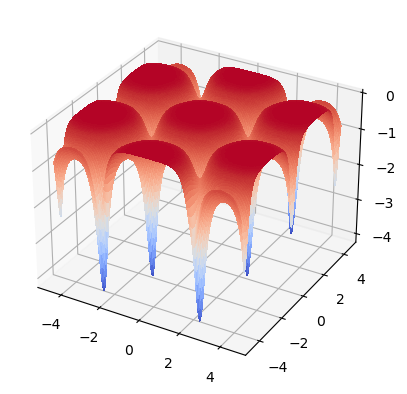

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0, antialiased=False)
#ax.set_xlim3d(0.0, num)
#ax.set_ylim3d(0.0, num)
#ax.set_zlim3d(-0.90, 0.90)
plt.show()

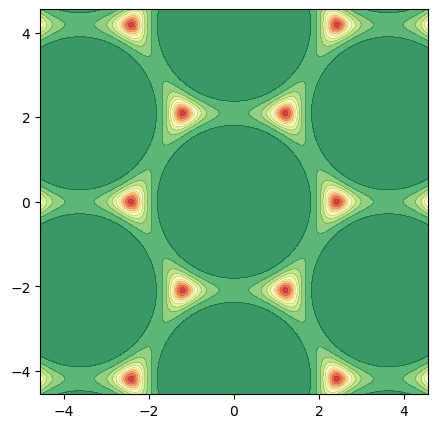

In [11]:
fig = plt.figure(figsize=(5,5))
plt.contourf(X,Y,Z,10,alpha=0.8,cmap=cm.RdYlGn)
C=plt.contour(X,Y,Z,10,colors='black',linewidths=0.1)
#plt.clabel(C, inline=True,fontsize=10)
plt.show()

In [12]:
xxx = np.linspace(-np.pi,np.pi,numk)
yyy = np.linspace(-np.pi,np.pi,numk)
C=0
dk = 2.0*np.pi/(numk-1)
for i in range(numk):
    for j in range(numk):
        k = np.array([xxx[i],yyy[j]])
        C=C+np.real(Omega(k))
print(C/2/np.pi*dk*dk)

-2.9194055325787582


In [13]:
#def H(k):  # one QAH model with Chern number = 2
#    t1 = 1.0
#    t2 = 1.0
#    t3 = 0.5
#    m = -1.0
#    H = np.zeros((2, 2), dtype=complex)
#    H[0, 1] = 2*t1*np.cos(k[0])-1j*2*t1*np.cos(k[1])
#    H[1, 0] = 2*t1*np.cos(k[0])+1j*2*t1*np.cos(k[1])
#    H[0, 0] = m+2*t3*np.sin(k[0])+2*t3*np.sin(k[1])+2*t2*np.cos(k[0]+k[1])
#    H[1, 1] = -(m+2*t3*np.sin(k[0])+2*t3*np.sin(k[1])+2*t2*np.cos(k[0]+k[1]))
#    return H

In [14]:
xxx = np.linspace(-np.pi,np.pi,numk)
yyy = np.linspace(-np.pi,np.pi,numk)
C=0
dk = 2.0*np.pi/(numk-1)
for i in range(numk):
    for j in range(numk):
        k = np.array([xxx[i],yyy[j]])
        C=C+Omega(k)
print(C/2/np.pi*dk*dk)

(-2.9194055325787582+2.0092199104915765e-18j)
